In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import matplotlib as mpl
import geopandas
import glob 
from sklearn import preprocessing

mpl.rcParams['pdf.fonttype'] = 42

## Cubic feet to cubic meters conversion factor
cfs_2_cms = 0.0283168466

In [2]:
pnwNP = pd.read_csv("../data/pnwNP_Info.csv")

### Pull out sites
shp = geopandas.read_file("../data/VIC_UW/shapefiles/columbia_seg.shp")
shp = pd.merge(pnwNP,shp,left_on='comid',right_on='POI_ID').fillna(0)

shp

,X,Unnamed..0,gage,counts,station_nm_x,dec_lat_va_x,dec_long_va_x,geometry_x,station_nm_y,dec_lat_va_y,...,start_y,TopElev,start_lon,start_lat,end_x,end_y,BotElev,end_lon,end_lat,geometry_y
0,0,0,12115700,29,"BOULDER CREEK NEAR CEDAR FALLS, WA",47.366216,-121.692882,POINT (-121.6928821 47.36621625),"BOULDER CREEK NEAR CEDAR FALLS, WA",47.366216,...,2966410.0,976.0,-121.70220,47.32619,-1.928014e+06,2.970866e+06,491.0,-121.68828,47.37071,"LINESTRING (-1930347.460 2966406.218, -1930350..."
1,1,1,12116500,1,"CEDAR RIVER AT CEDAR FALLS, WA",47.417047,-121.792054,POINT (-121.792054 47.41704715),"CEDAR RIVER AT CEDAR FALLS, WA",47.417047,...,2972760.0,438.0,-121.69821,47.38659,-1.935462e+06,2.977588e+06,259.0,-121.80645,47.41128,"LINESTRING (-1928272.375 2972758.869, -1928508..."
2,3,3,12323770,3,Warm Springs Creek at Warm Springs MT,46.180375,-112.785078,POINT (-112.7850778 46.180375),Warm Springs Creek at Warm Springs MT,46.180375,...,2688030.0,1552.0,-112.89231,46.13745,-1.291507e+06,2.691327e+06,1453.0,-112.78146,46.18149,"LINESTRING (-1300812.791 2688029.087, -1300713..."
3,4,4,12465000,2,"CRAB CREEK AT IRBY, WA",47.360424,-118.850002,POINT (-118.8500022 47.3604238),"CRAB CREEK AT IRBY, WA",47.360424,...,2909510.0,469.0,-118.68575,47.33420,-1.722703e+06,2.916895e+06,410.0,-118.89412,47.36793,"LINESTRING (-1708205.499 2909512.879, -1708279..."
4,5,5,12513000,63,"ESQUATZEL COULEE AT CONNELL, WA",46.663473,-118.863334,POINT (-118.863334 46.66347327),"ESQUATZEL COULEE AT CONNELL, WA",46.663473,...,2852360.0,326.0,-118.82419,46.77912,-1.739756e+06,2.840169e+06,252.0,-118.87140,46.65779,"LINESTRING (-1733037.493 2852358.456, -1733058..."
5,6,6,13055340,31,SF TETON RIVER NEAR REXBURG ID,43.835000,-111.777778,POINT (-111.7777778 43.835),SF TETON RIVER NEAR REXBURG ID,43.835000,...,2423280.0,1496.0,-111.70237,43.86845,-1.259234e+06,2.421023e+06,1480.0,-111.79207,43.83714,"LINESTRING (-1251572.143 2423282.498, -1251572..."
6,7,7,13058000,5,WILLOW CREEK NR RIRIE ID,43.583333,-111.746111,POINT (-111.746111 43.5833333),WILLOW CREEK NR RIRIE ID,43.583333,...,2378200.0,1562.0,-111.72817,43.45574,-1.260686e+06,2.392728e+06,1513.0,-111.75167,43.58489,"LINESTRING (-1261196.854 2378199.021, -1261191..."
7,8,8,13068500,16,BLACKFOOT RIVER NR BLACKFOOT ID,43.130556,-112.476667,POINT (-112.4766667 43.13055556),BLACKFOOT RIVER NR BLACKFOOT ID,43.130556,...,2354800.0,1365.0,-112.33790,43.16803,-1.328428e+06,2.352662e+06,1336.0,-112.49548,43.12872,"LINESTRING (-1315111.766 2354795.876, -1315231..."
8,9,9,13068501,15,BLACKFOOT RIVER AND BYPASS CHANNEL NR BLACKFOO...,43.130470,-112.477204,POINT (-112.4772036 43.13047008),BLACKFOOT RIVER AND BYPASS CHANNEL NR BLACKFOO...,43.130470,...,2354800.0,1365.0,-112.33790,43.16803,-1.328428e+06,2.352662e+06,1336.0,-112.49548,43.12872,"LINESTRING (-1315111.766 2354795.876, -1315231..."
9,10,10,13082500,1,GOOSE CREEK AB TRAPPER CREEK NR OAKLEY ID,42.126111,-113.935556,POINT (-113.9355556 42.1261111),GOOSE CREEK AB TRAPPER CREEK NR OAKLEY ID,42.126111,...,2250130.0,1502.0,-113.99152,41.99573,-1.464035e+06,2.263684e+06,1454.0,-113.93498,42.12705,"LINESTRING (-1471358.770 2250130.208, -1471364..."


14015000


<Figure size 720x432 with 0 Axes>

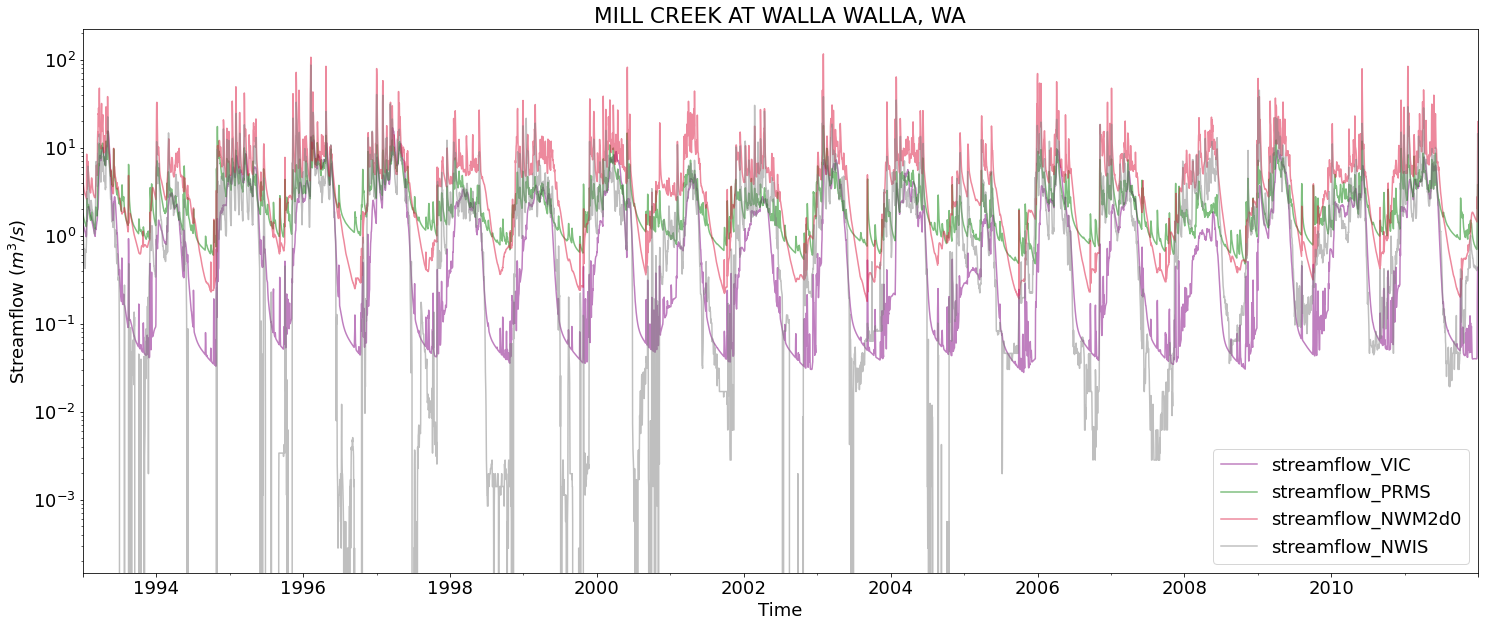

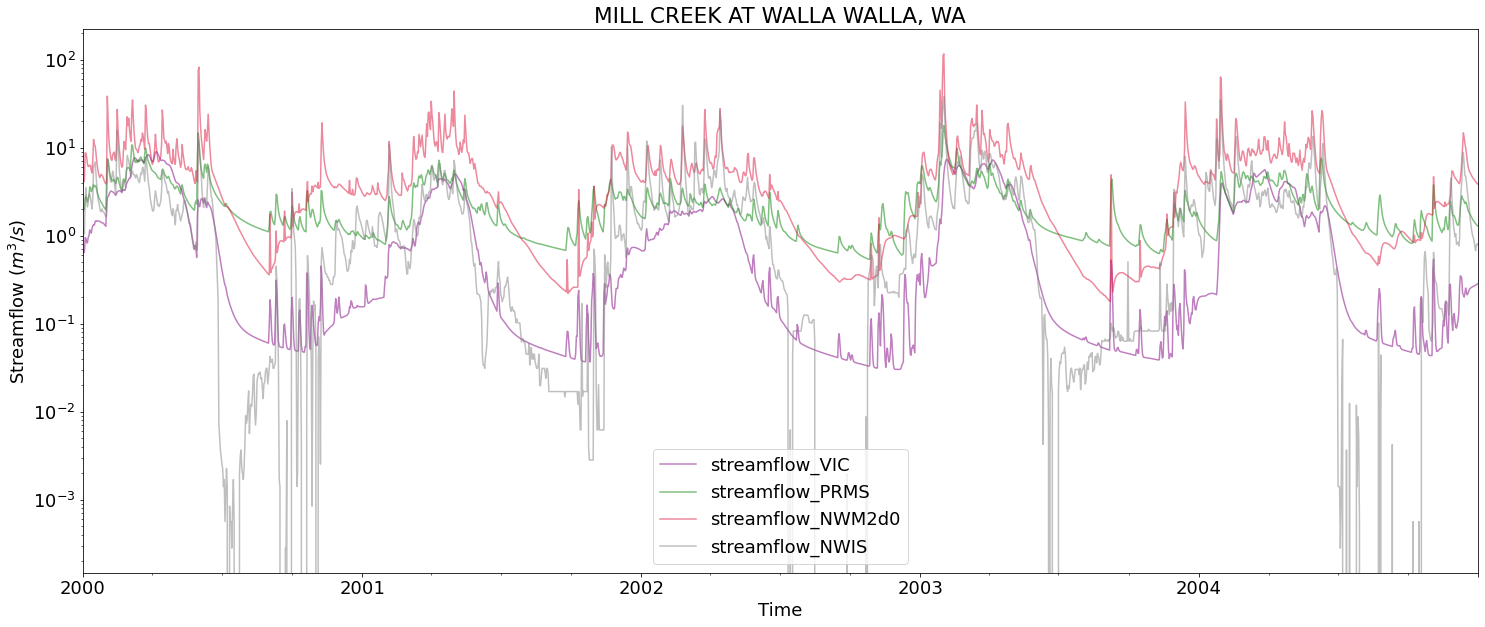

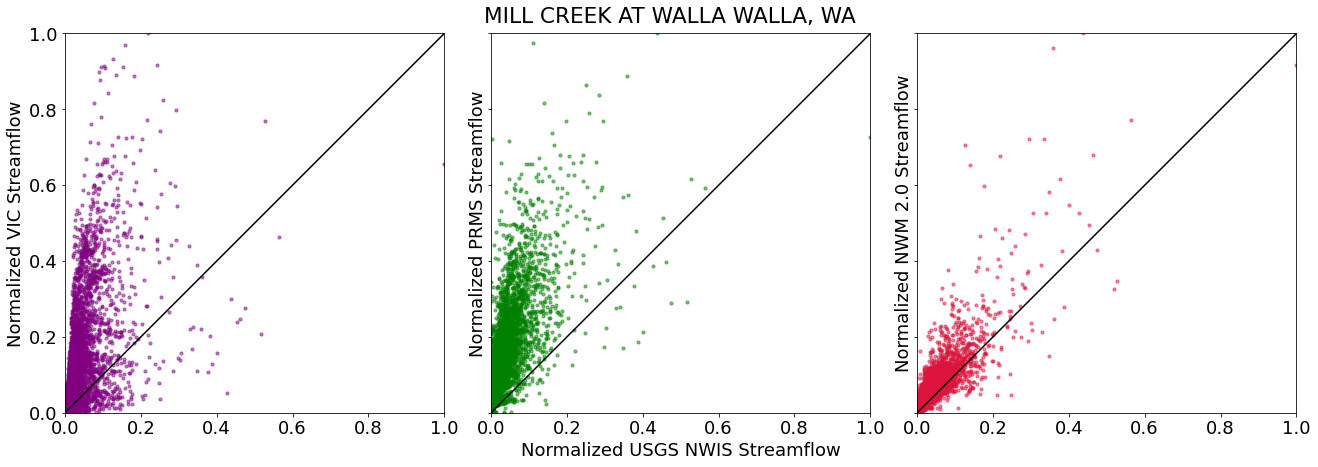

In [3]:
# for i in range(len(shp)):
pos = [22]
for i in pos:
    print(shp['gage'][i])
    gage = '*'+str(shp['gage'][i])+'*'
    file = glob.glob("../data/pnwNP_modeledData/"+gage)[0]

    datMain = pd.read_csv(file).drop(['Unnamed: 0','gage'],axis=1)
    datMain['time'] = pd.to_datetime(datMain['time'])
    datMain['time'] = datMain['time'].dt.tz_localize(None)
    ######################
    ### Plot full streamflow record
    ######################
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(10,6))
    ax = datMain.plot(x = "time",figsize = (25,10),logy=True,alpha=0.5,color = ['purple','green','crimson','grey'])
    ax.set_xlabel('Time')
    ax.set_ylabel('Streamflow $(m^3/s)$')
    ax.set_title(shp['station_nm_x'][i])

    plt.savefig('../docs/pnwModeled/'+str(shp['gage'][i])+"_streamflow.pdf")
    plt.savefig('../docs/pnwModeled/'+str(shp['gage'][i])+"_streamflow.png",dpi=300)

    ######################
    ## Plot streamflow from 2000 - 2004
    ######################

    sub = datMain[ (datMain["time"] >= '2000-01-01') & (datMain["time"] <= '2004-12-31')]
    ax = sub.plot(x = "time",figsize = (25,10),logy=True,alpha=0.5,color = ['purple','green','crimson','grey'])
    ax.set_xlabel('Time')
    ax.set_ylabel('Streamflow $(m^3/s)$')
    ax.set_title(shp['station_nm_x'][i])
    # ax.set_xlim(np.min(sub['time']),np.max(sub['time']))

    plt.savefig('../docs/pnwModeled/'+str(shp['gage'][i])+"_streamflowSubset.pdf")
    plt.savefig('../docs/pnwModeled/'+str(shp['gage'][i])+"_streamflowSubset.png",dpi=300)

    ######################
    ## Make a normalized dataframe for plotting
    ######################

    tt = datMain
    tt.index = datMain['time']
    tt =  tt.drop('time',axis=1)
    tt = pd.DataFrame(preprocessing.minmax_scale(tt))
    tt.index = datMain['time']
    tt.columns = ["streamflow_VIC","streamflow_PRMS","streamflow_NWM2d0","streamflow_NWIS"]

    tt.to_csv('../data/pnwNP_modeledDataNormalized/'+str(shp['gage'][i])+"_normalized.csv")


    ######################
    #### Plot 1 to 1
    ######################

    fig, axs = plt.subplots(1,3, sharey=True,figsize=(18,6),subplot_kw=dict(box_aspect=1))
    fig.suptitle(shp['station_nm_x'][i])


    pt = (0, 0)
    plt.tight_layout(pad=0.4, w_pad=1, h_pad=0.5)
    axs[0].scatter(x = tt["streamflow_NWIS"],y=tt["streamflow_VIC"],alpha = 0.5,color = "purple",s=10)
    axs[1].scatter(x = tt["streamflow_NWIS"],y=tt["streamflow_PRMS"],alpha = 0.5,color = 'green',s=10)
    axs[2].scatter(x = tt["streamflow_NWIS"],y=tt["streamflow_NWM2d0"],alpha = 0.5,color = 'crimson',s=10)
    axs[0].axline(pt,slope=1, color='black')
    axs[1].axline(pt,slope=1, color='black')
    axs[2].axline(pt,slope=1, color='black')
    axs[0].set_ylabel('Normalized VIC Streamflow')
    axs[1].set_ylabel('Normalized PRMS Streamflow')
    axs[2].set_ylabel('Normalized NWM 2.0 Streamflow')
    axs[1].set_xlabel('Normalized USGS NWIS Streamflow')
    axs[0].set_ylim(0,1)
    axs[0].set_xlim(0,1)
    axs[1].set_ylim(0,1)
    axs[1].set_xlim(0,1)
    axs[2].set_ylim(0,1)
    axs[2].set_xlim(0,1)

    plt.savefig('../docs/pnwModeled/'+str(shp['gage'][i])+"_1to1.pdf",bbox_inches='tight')
    plt.savefig('../docs/pnwModeled/'+str(shp['gage'][i])+"_1to1.png",dpi=300,bbox_inches='tight')

In [36]:
np.max(sub['time'])

'2004-12-31'